In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
data = pd.read_csv('~/miniconda3/Github Projects/breast-cancer-prediction/data.csv')

In [48]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [49]:
data.shape

(569, 32)

In the result, it can be seen that the data has 569 records, each with 32 columns.

In [50]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [51]:
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

There are no Null values in the dataset. 

In [52]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

# Exploratory Data Analysis (EDA)

In [53]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Here, we can see that the "Diagnosis" is the dependent variable. We will build a model to classify breast cancer tumor in two training classification:

1 = Malignant (Cancerous) - Present
0 = Benign (Not Cancerous) -Absent

Text(0, 0.5, 'Count')

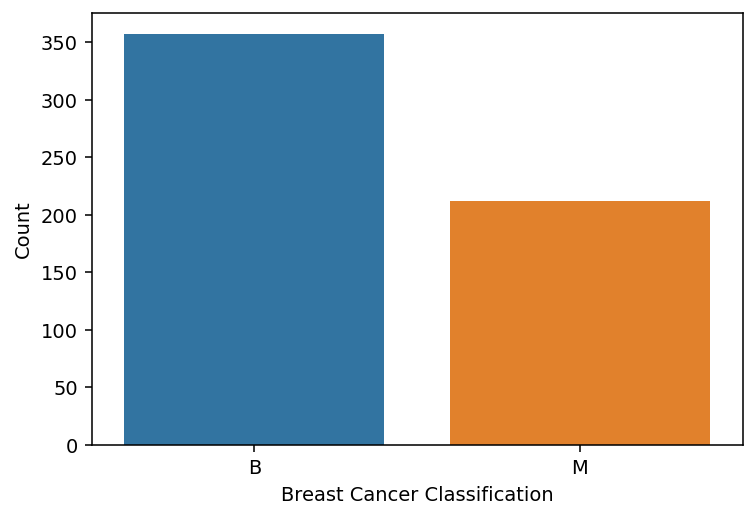

In [54]:
plt.figure(figsize=(6,4),dpi=140)
sns.barplot(x=data['diagnosis'].value_counts().index,y=data['diagnosis'].value_counts().values);
plt.xlabel('Breast Cancer Classification')
plt.ylabel('Count')

The graph shows that our dataset has more entries of Benign case than Malignant case.  

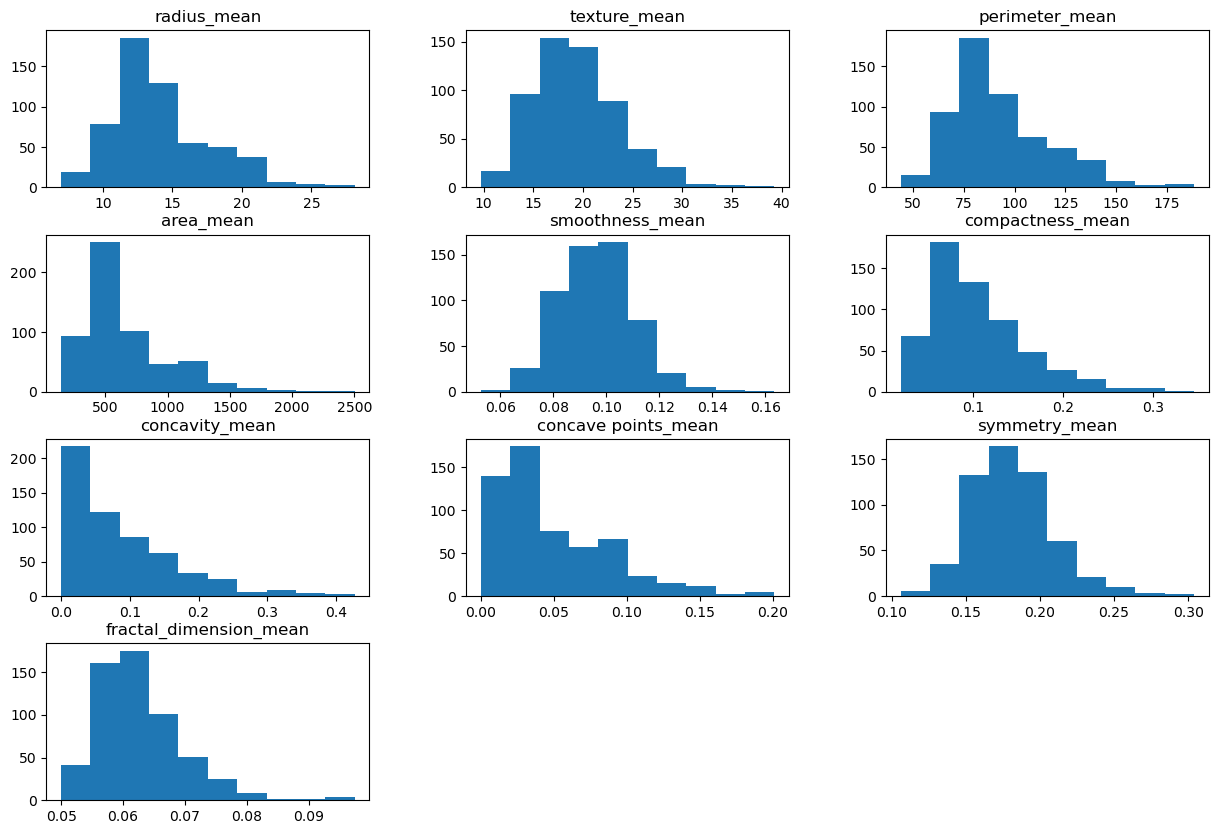

In [55]:
mean_components = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
df_mean = data[mean_components]
df_mean.hist(bins=10, figsize=(15, 10),grid=False,);

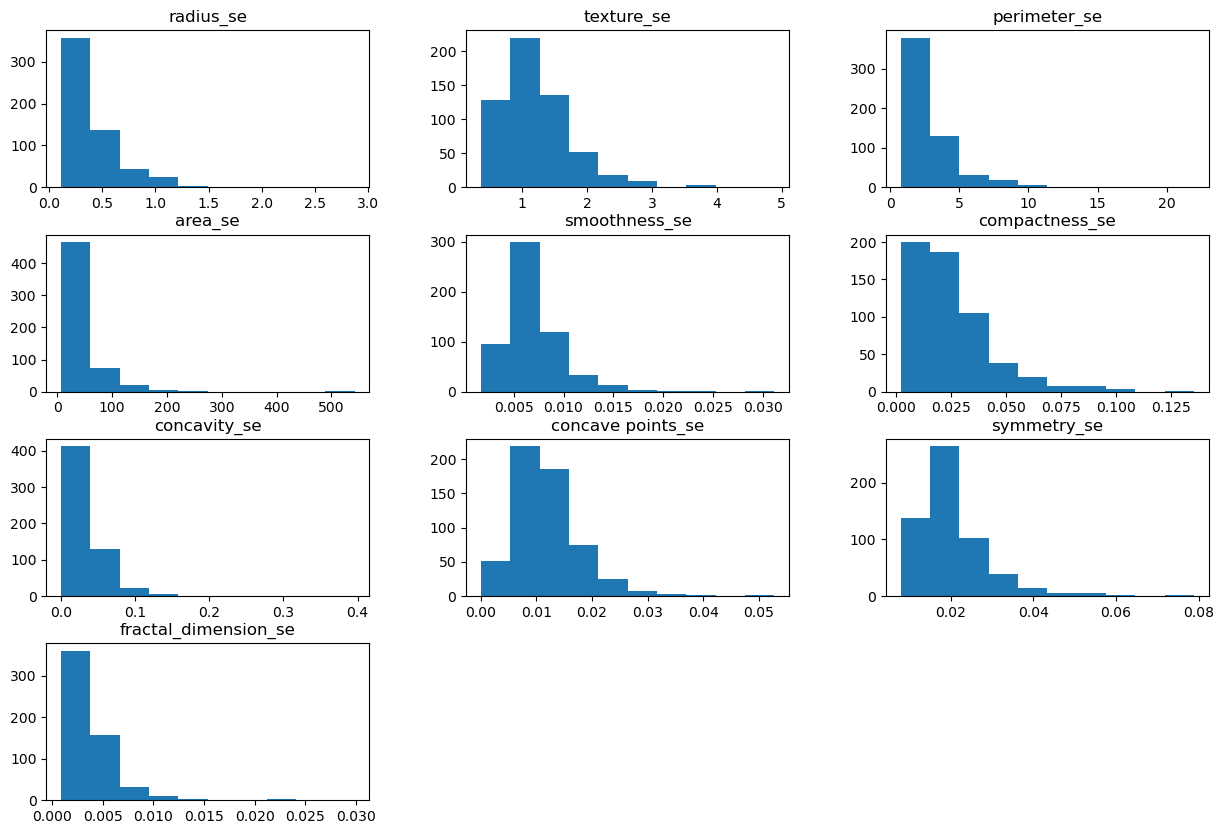

In [56]:
se_components = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']
df_se = data[se_components]
df_se.hist(bins=10, figsize=(15, 10),grid=False,);

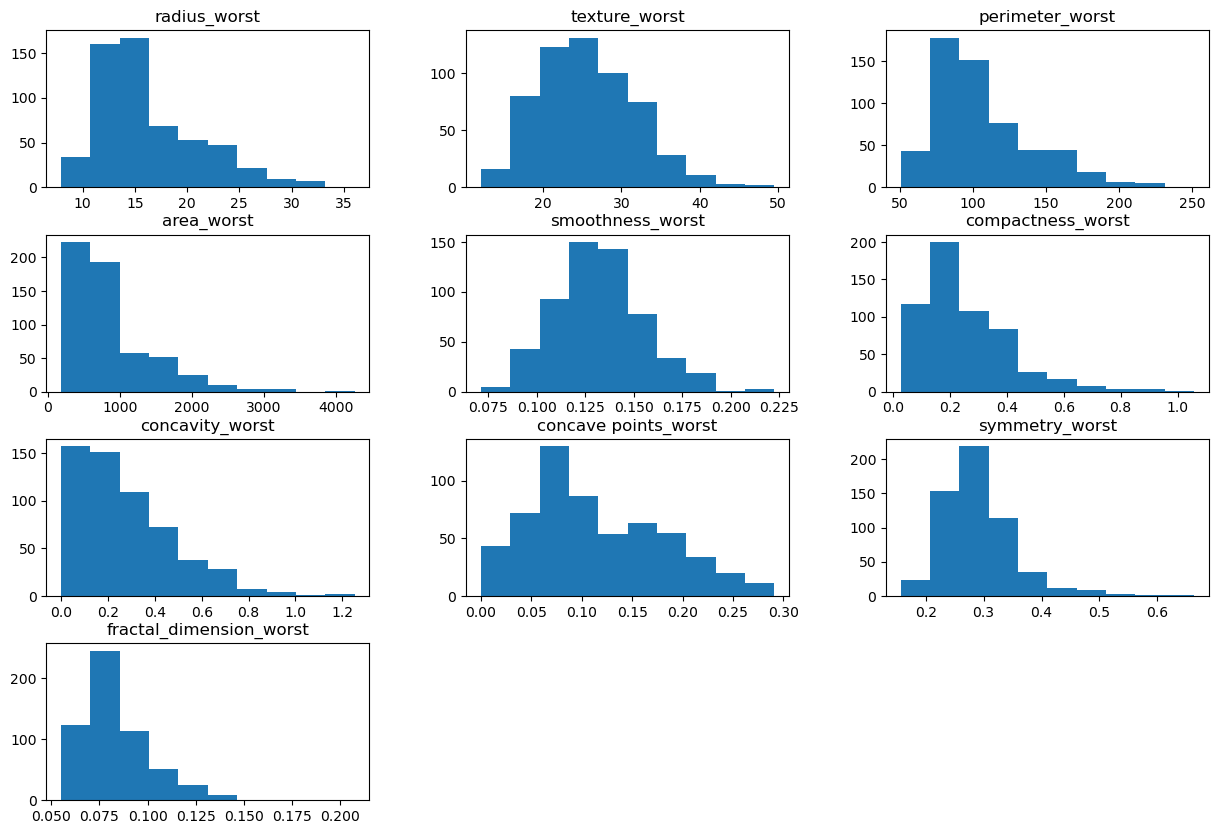

In [57]:
worst_components = ['radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
df_worst = data[worst_components]
df_worst.hist(bins=10, figsize=(15, 10),grid=False,);

We can see that the texture, smooth and symmetry attributes may have a Gaussian or nearly Gaussian distribution (normal distribution).

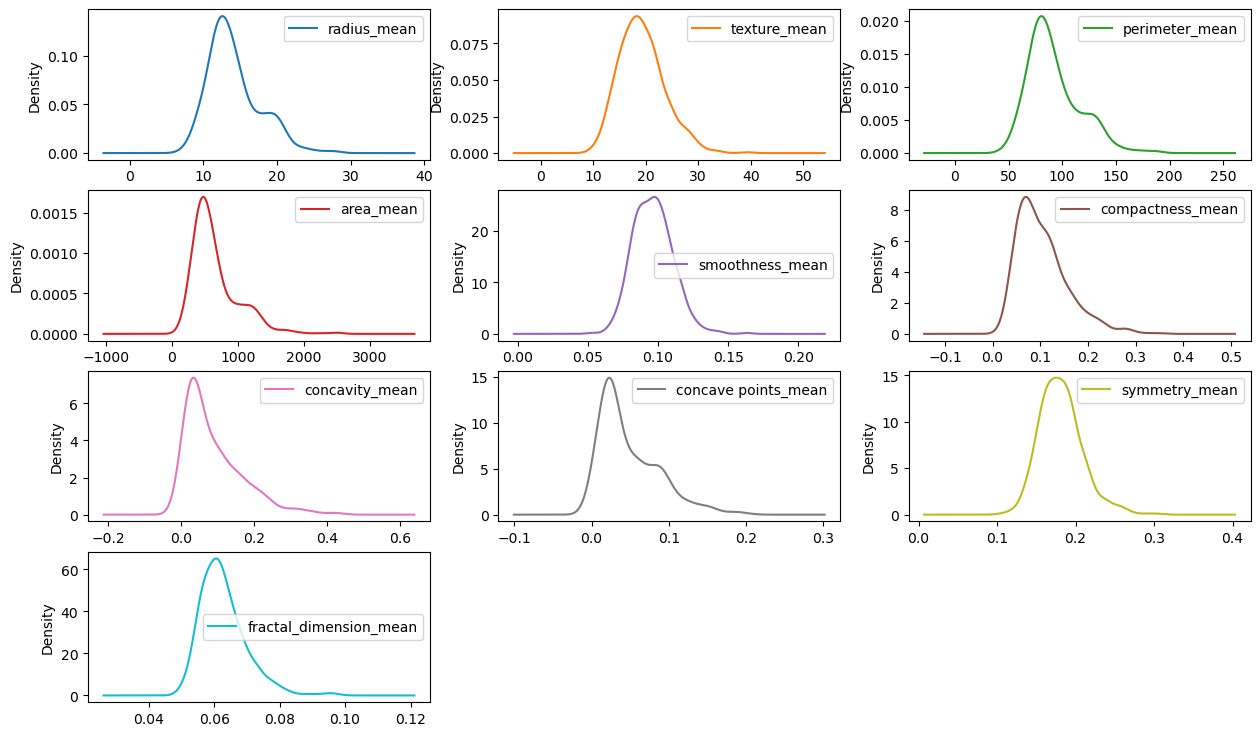

In [58]:
df_mean.plot(kind='kde',subplots=True,sharex=False,sharey=False,layout=(4,3),figsize=(15,9));

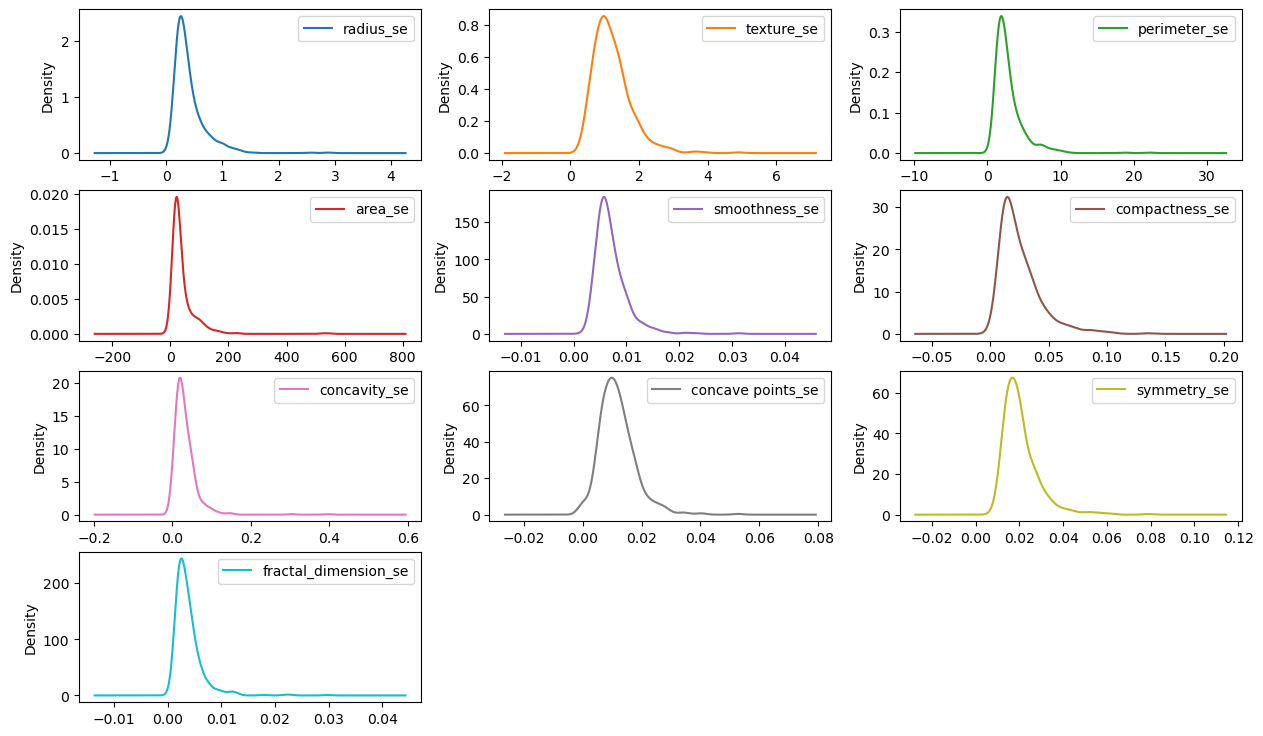

In [59]:
df_se.plot(kind='kde',subplots=True,sharex=False,sharey=False,layout=(4,3),figsize=(15,9));

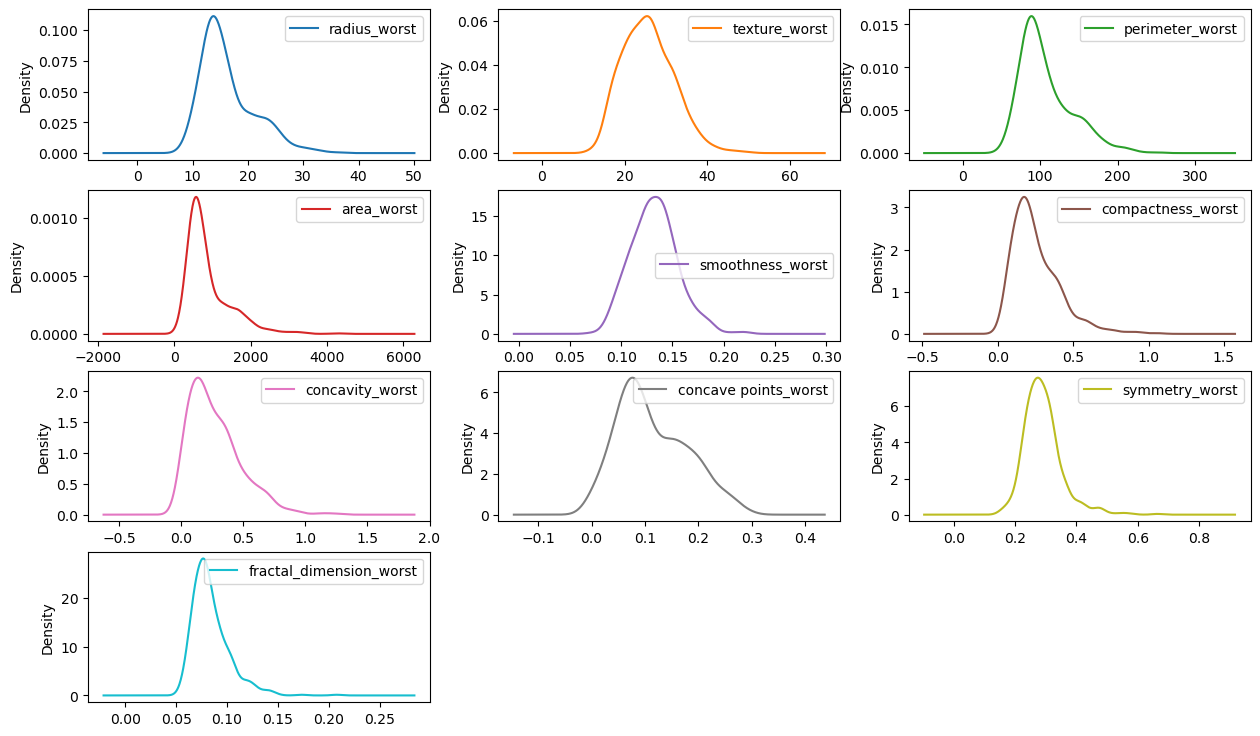

In [60]:
df_worst.plot(kind='kde',subplots=True,sharex=False,sharey=False,layout=(4,3),figsize=(15,9));

From these graphs, we observe that the texture, smooth and symmetry attributes have a Gaussian or nearly Gaussian distribution (normal distribution).

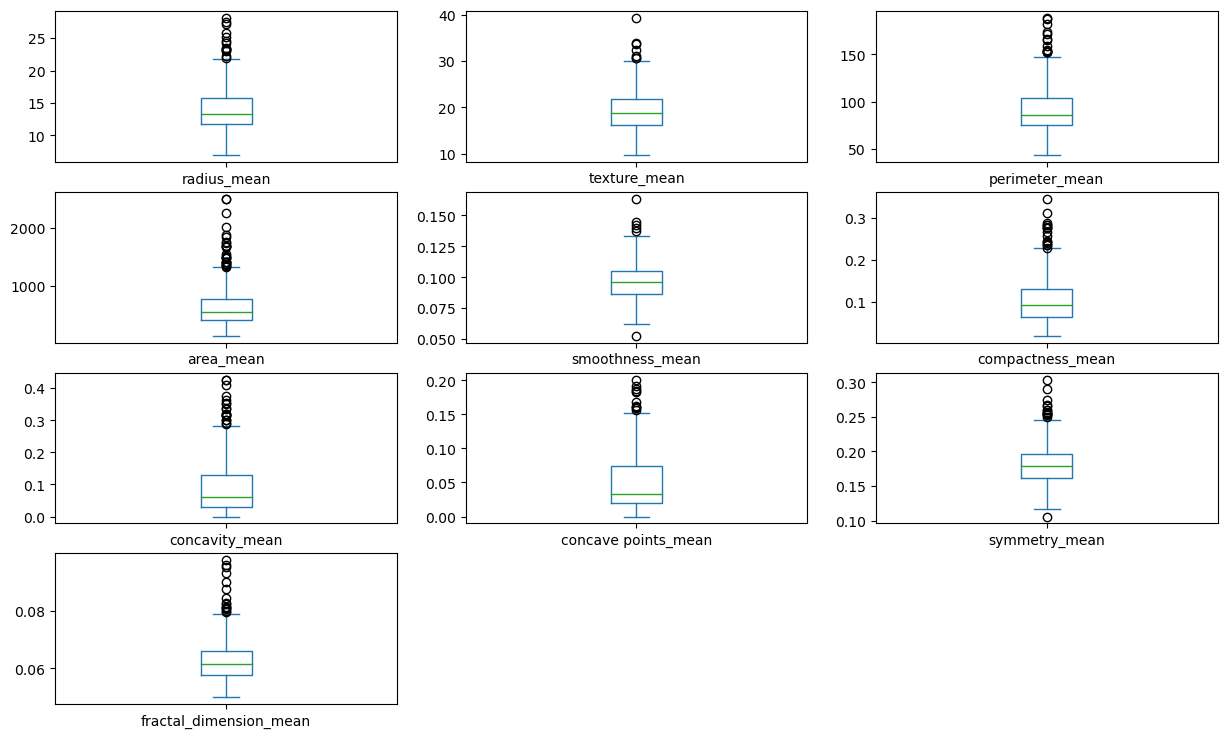

In [61]:
df_mean.plot(kind='box',subplots=True,sharex=False,sharey=False,layout=(4,3),figsize=(15,9));

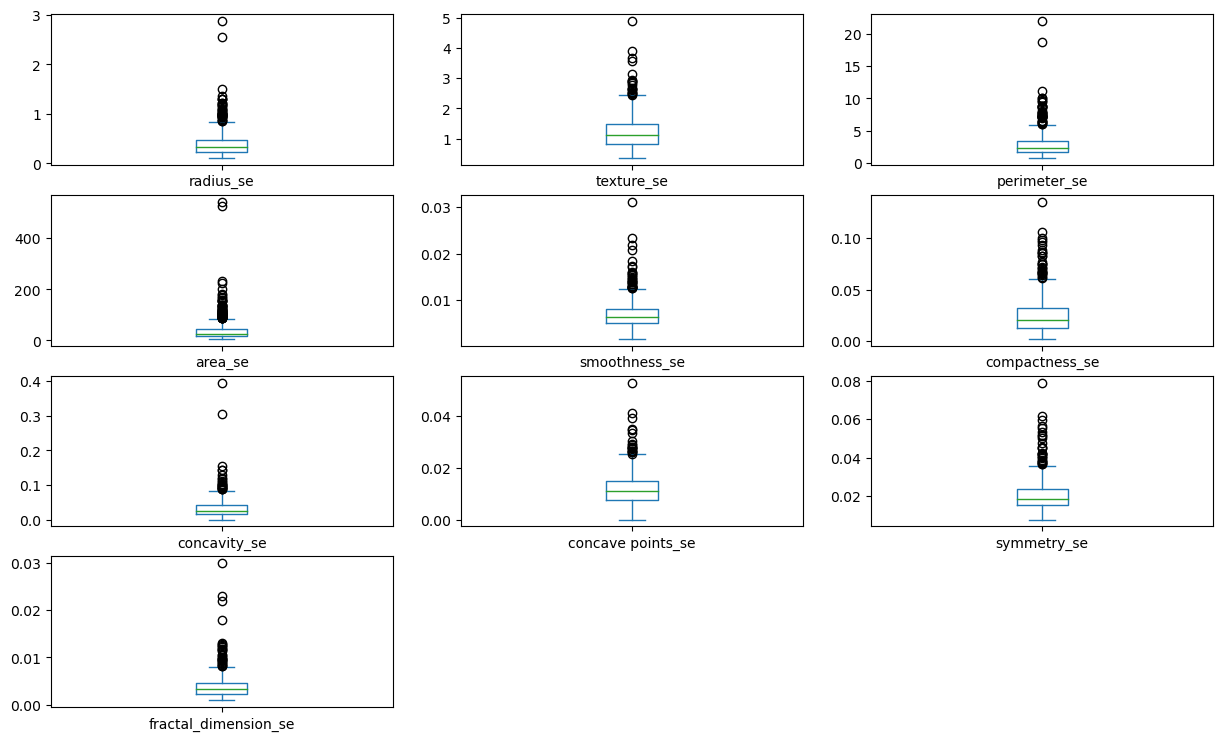

In [62]:
df_se.plot(kind='box',subplots=True,sharex=False,sharey=False,layout=(4,3),figsize=(15,9));

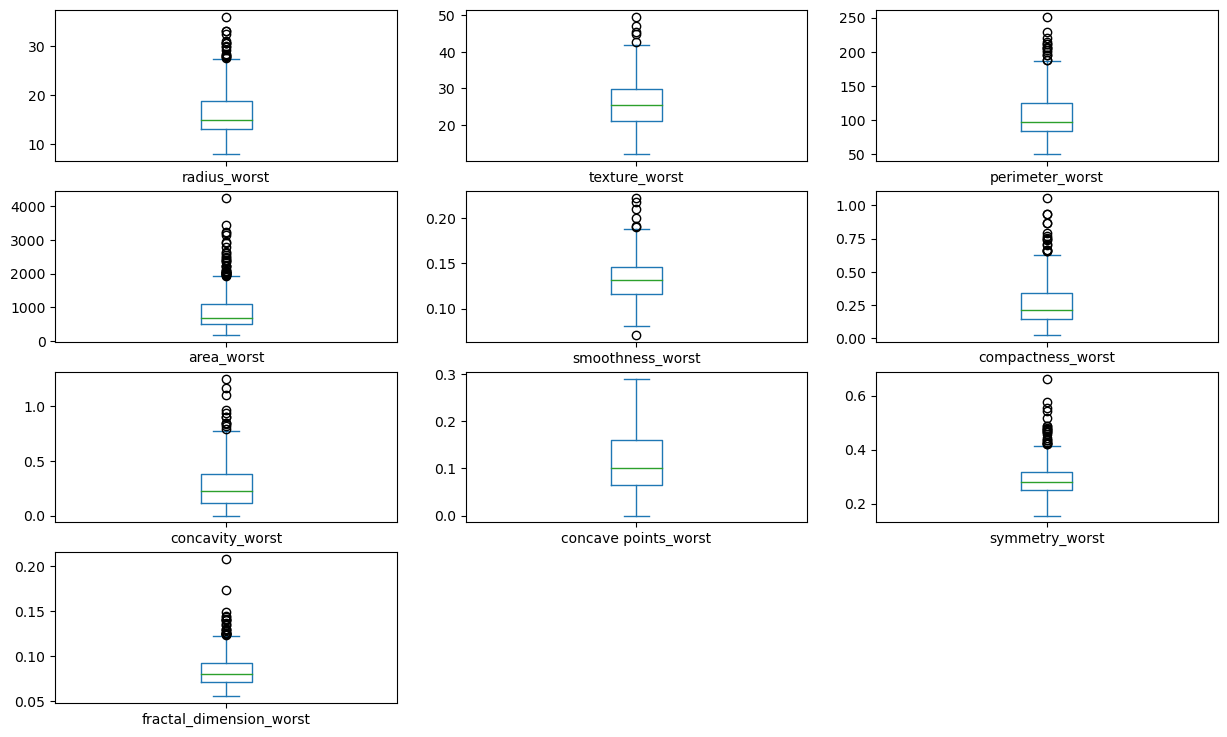

In [63]:
df_worst.plot(kind='box',subplots=True,sharex=False,sharey=False,layout=(4,3),figsize=(15,9));

# Bivariate Analysis

In [64]:
data = data.drop('id',axis=1)  #Id is not required since its not a feature

In [65]:
corr = df_mean.corr()

<AxesSubplot: >

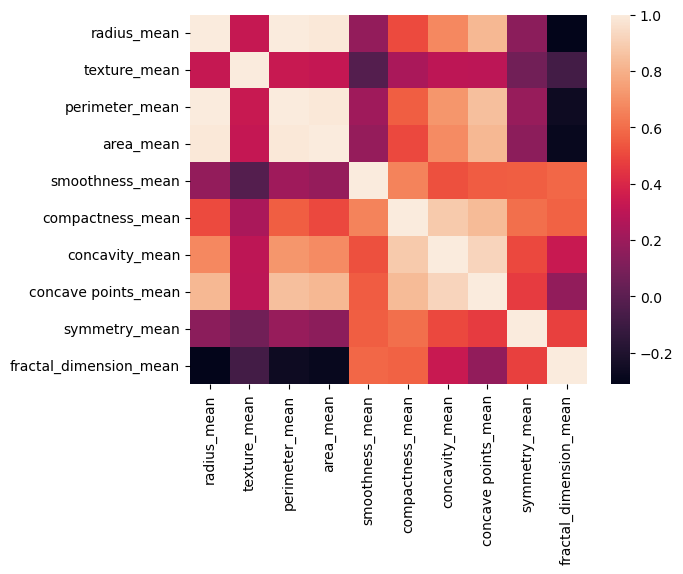

In [66]:
sns.heatmap(corr)

From the above heatmap, we can observe that there is a strong positive correlation between mean area and mean radius and mean perimeter.
Concavity with area and perimeter mean values has moderate correlation between them. 
Also, there is a strong negative correlation between fractal dimension with radius, perimeter, area mean values. 


In [67]:
mean_hue = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean','compactness_mean', 'concavity_mean']
mean_hue = data[mean_hue]

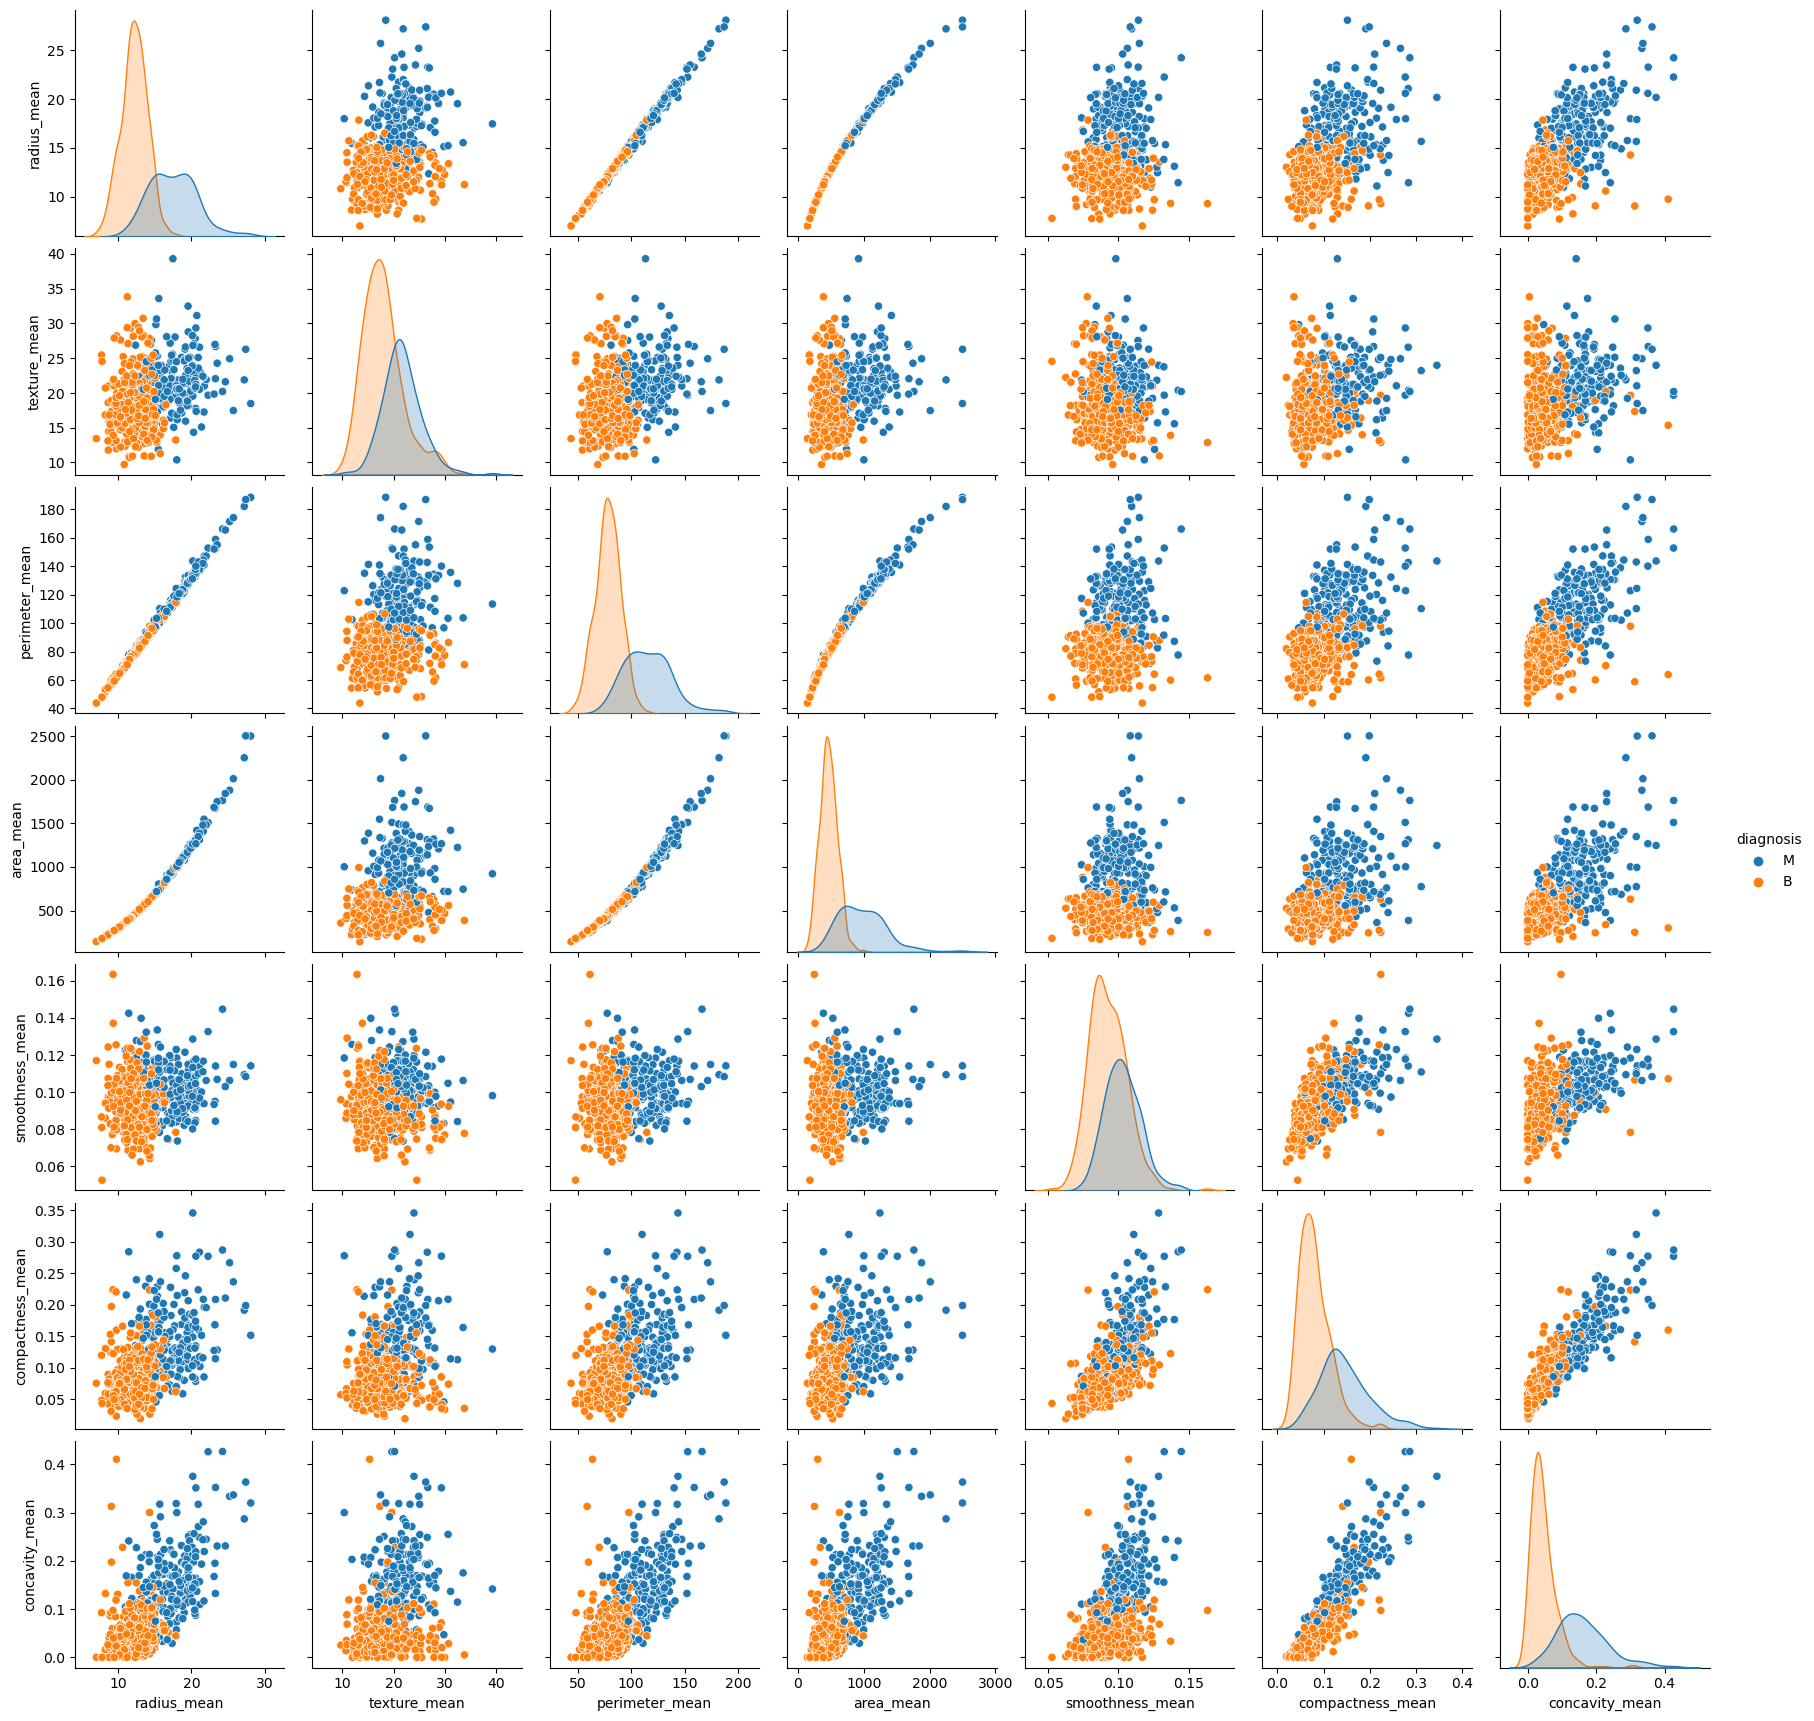

In [68]:
sns.pairplot(mean_hue,hue='diagnosis',height=2.5)

Observations from EDA:

1. Mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors.

2. In any of the histograms there are no noticeable large outliers that warrants further cleanup.



# Pre-processing

In [69]:
x = data.drop('diagnosis',axis=1)
y = data['diagnosis']

In [70]:
#converting the labels from their string representation (M and B) into integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(['M','B'])
y = le.transform(y)

In [71]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss = ss.fit_transform(x)

In [72]:
x = pd.DataFrame(ss,columns=x.columns)

In [74]:
from sklearn.model_selection import train_test_split

In [76]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,stratify=y,test_size=0.25)

In [79]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((426, 30), (143, 30), (426,), (143,))

# Model Building

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
lr = LogisticRegression()
model_lr = lr.fit(xtrain,ytrain)

In [88]:
from sklearn.metrics import f1_score

In [89]:
pred_lr = model_lr.predict(xtest)

In [90]:
f1_score(pred_lr,ytest)

0.9714285714285713

In [91]:
from sklearn.metrics import roc_auc_score

In [92]:
roc_auc_score(pred_lr,ytest)

0.9793956043956045

In [99]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = metrics.confusion_matrix(ytest, pred_lr)

In [101]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model_lr.classes_)

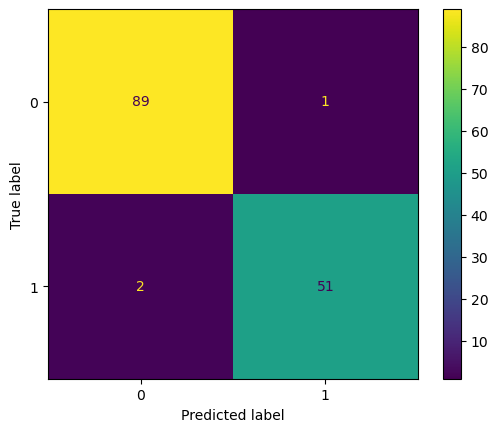

In [102]:
disp.plot()